In [ ]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.style.use('seaborn-dark')

# Customize additional plot settings
plt.rcParams['axes.facecolor'] = '#272B30'  # Dark background color
plt.rcParams['axes.edgecolor'] = 'grey'  # Color of axes edges
plt.rcParams['axes.labelcolor'] = 'grey'  # Color of axis labels
plt.rcParams['text.color'] = 'grey'  # Color of text


#### Data loading

Declare channel and symmetric pairs, then load the data.

In [2]:
ch_names = ["Fp1","AF3","F3","F7","FC5","FC1","C3","T7","CP5","CP1","P3","P7","PO3","O1","Oz","Pz","Fp2","AF4","Fz","F4","F8","FC6","FC2","Cz","C4","T8","CP6","CP2","P4","P8","PO4","O2"]
symm_pairs = [["Fp1", "Fp2"], ["AF3", "AF4"], ["F3", "F4"], ["FC1", "FC2"], ["C3", "C4"], ["CP1", "CP2"], ["P3", "P4"], ["PO3", "PO4"], ["O1", "O2"]]

df = pd.read_json('data/DEAP_features_updated.json')
df.head()

,subject_id,session,record_type,Power_alpha,mean_Power_alpha,Normalized_power_alpha,mean_Normalized_power_alpha,Power_beta,mean_Power_beta,Normalized_power_beta,...,arousal,dominance,liking,age,gender,VAQ_Estimate,VAQ_Estimate_class,a_labels,v_labels,va_labels
0,s14,8,Acquisition,"[[1.39199e-05, 1.5184e-05, 1.51684e-05, 9.8046...","[1.10736e-05, 5.2909000000000005e-06, 0.000209...","[[0.2286928664, 0.2487042328, 0.28118935440000...","[0.2835454673, 0.2457632684, 0.1555936869, 0.2...","[[1.0948900000000001e-05, 1.1237800000000001e-...","[7.7243e-06, 4.2903e-06, 0.0001196128000000000...","[[0.1798824001, 0.184067956, 0.1881697414, 0.2...",...,6.21,7.18,7.96,27,Female,2,LAHV,HA,HV,HAHV
1,s04,35,Acquisition,"[[0.0001932151, 0.00024126720000000002, 0.0004...","[0.00025054790000000003, 0.000202806, 2.37586e...","[[0.0484104396, 0.0563312195, 0.0818110434, 0....","[0.1110807984, 0.1035601449, 0.1330524769, 0.1...","[[0.0001366816, 0.0001481869, 0.0001630817, 0....","[0.0001096286, 7.87506e-05, 1.21492e-05, 9.751...","[[0.0342458669, 0.034598781, 0.028573864900000...",...,2.88,1.06,3.37,24,Female,4,HALV,LA,LV,LALV
2,s32,19,Acquisition,"[[1.6806e-06, 1.5286e-06, 1.4480000000000002e-...","[1.6116000000000002e-06, 4.6014000000000005e-0...","[[0.2193263216, 0.2114225595, 0.2190674628, 0....","[0.2636117545, 0.1406454269, 0.2902643796, 0.1...","[[1.9068000000000001e-06, 1.8538000000000001e-...","[1.6796e-06, 5.731000000000001e-06, 1.72930000...","[[0.24885206070000002, 0.2564024466, 0.2444644...",...,7.24,9.00,8.04,33,Female,2,LAHV,HA,HV,HAHV
3,s10,30,Acquisition,"[[1.77161e-05, 1.6541e-05, 1.45427e-05, 1.4604...","[4.2116e-05, 5.82385e-05, 1.8171000000000003e-...","[[0.1347507061, 0.1340340677, 0.1284780137, 0....","[0.1556361574, 0.19362278230000002, 0.18418521...","[[1.3316900000000001e-05, 1.19892e-05, 1.09503...","[2.10637e-05, 3.44055e-05, 9.1662e-06, 1.51287...","[[0.1012899743, 0.09715008400000001, 0.0967411...",...,5.04,3.18,4.99,31,Female,3,LALV,HA,LV,HALV
4,s09,4,Baseline,"[[4.252e-06], [2.5852000000000003e-06], [3.609...","[4.252e-06, 2.5852000000000003e-06, 3.60910000...","[[0.1344404571], [0.1970658409], [0.0570767497...","[0.1344404571, 0.1970658409, 0.057076749700000...","[[1.7954e-06], [1.3131e-06], [2.0771e-06], [1....","[1.7954e-06, 1.3131e-06, 2.0771e-06, 1.3265000...","[[0.056766673100000005], [0.10009675550000001]...",...,5.97,5.03,6.09,25,Female,1,HAHV,HA,HV,HAHV


#### Plotting functions

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], color='black', marker='*', s=55, label='test set')

#### Single subject data preparation

Select a subject by their id

In [4]:
subject_id = 's21'
sub_df = df[(df.subject_id == subject_id) & (df.record_type == 'Acquisition') ]
sub_df

,subject_id,session,record_type,Power_alpha,mean_Power_alpha,Normalized_power_alpha,mean_Normalized_power_alpha,Power_beta,mean_Power_beta,Normalized_power_beta,...,arousal,dominance,liking,age,gender,VAQ_Estimate,VAQ_Estimate_class,a_labels,v_labels,va_labels
24,s21,17,Acquisition,"[[9.0201e-06, 1.0946500000000001e-05, 1.018790...","[6.3737000000000005e-06, 3.2627e-06, 3.7182000...","[[0.3008610532, 0.3068962295, 0.2988201776, 0....","[0.2520422625, 0.2611381444, 0.1915668476, 0.1...","[[6.0733e-06, 6.5177e-06, 6.0748e-06, 6.0082e-...","[4.7096e-06, 2.3122e-06, 3.4141e-06, 1.30738e-...","[[0.20257145780000002, 0.18273069890000002, 0....",...,4.01,5.03,2.91,30,Male,2,LAHV,LA,HV,LAHV
145,s21,19,Acquisition,"[[2.9794000000000002e-06, 2.7416e-06, 2.7932e-...","[7.148000000000001e-06, 3.5509e-06, 9.6032e-06...","[[0.1432763141, 0.1383030936, 0.1385248496, 0....","[0.1937717333, 0.1864602216, 0.1883706033, 0.1...","[[4.1978e-06, 4.1767e-06, 4.0384e-06, 4.0723e-...","[5.7422e-06, 2.5783e-06, 3.8484e-06, 1.66063e-...","[[0.2018668317, 0.2107002997, 0.2002818694, 0....",...,6.29,7.72,6.78,30,Male,2,LAHV,HA,HV,HAHV
207,s21,13,Acquisition,"[[4.8735e-06, 6.8564e-06, 5.8158e-06, 6.1753e-...","[6.1979e-06, 3.2746e-06, 5.6125e-06, 2.37219e-...","[[0.21227186650000002, 0.2541221786, 0.2476997...","[0.2164370477, 0.2286951691, 0.1760304311, 0.1...","[[4.2988e-06, 5.5313e-06, 5.1448e-06, 5.3773e-...","[5.8346e-06, 2.7388e-06, 3.9378e-06, 1.61802e-...","[[0.18723915260000001, 0.2050087278, 0.2191221...",...,6.17,4.83,4.71,30,Male,2,LAHV,HA,LV,HALV
217,s21,7,Acquisition,"[[4.5158e-06, 6.1978e-06, 7.6801e-06, 8.290300...","[7.0284e-06, 3.2044e-06, 4.194e-06, 1.78003e-0...","[[0.23409185200000002, 0.24867406400000003, 0....","[0.1703800097, 0.2099008984, 0.1940738646, 0.1...","[[5.3131e-06, 8.2498e-06, 9.944500000000001e-0...","[1.03559e-05, 2.8587000000000003e-06, 3.532200...","[[0.2754240964, 0.3310041771, 0.2597764378, 0....",...,6.58,7.17,6.54,30,Male,1,HAHV,HA,HV,HAHV
254,s21,9,Acquisition,"[[3.7250000000000003e-06, 4.3203e-06, 6.277100...","[5.7524e-06, 2.1758e-06, 2.5625e-06, 1.1978000...","[[0.16103955450000002, 0.1312353355, 0.1578218...","[0.14916779730000002, 0.1808310386, 0.18021074...","[[6.5972e-06, 9.1793e-06, 1.0425000000000001e-...","[1.08207e-05, 2.5566000000000002e-06, 2.516e-0...","[[0.28520934740000004, 0.278834211, 0.26210983...",...,7.00,8.60,8.03,30,Male,2,LAHV,HA,HV,HAHV
268,s21,15,Acquisition,"[[8.2387e-06, 6.8994e-06, 7.5022e-06, 8.0683e-...","[5.6306e-06, 2.7242e-06, 2.2856e-06, 1.07676e-...","[[0.2780241123, 0.2926481872, 0.2780144687, 0....","[0.2277457045, 0.24061684560000002, 0.18610757...","[[5.563700000000001e-06, 4.5492e-06, 4.8183e-0...","[5.625e-06, 2.2594e-06, 2.3813e-06, 1.07684e-0...","[[0.18775130810000001, 0.1929587247, 0.1785559...",...,5.99,6.00,6.10,30,Male,2,LAHV,HA,HV,HAHV
534,s21,38,Acquisition,"[[2.7024e-06, 2.5298e-06, 2.5108e-06, 2.2666e-...","[5.11e-06, 2.1128e-06, 1.8021e-06, 9.2495e-06,...","[[0.17559000660000001, 0.177783674, 0.17577447...","[0.1742246167, 0.207218275, 0.1496797472000000...","[[4.8434e-06, 4.4565000000000004e-06, 4.1847e-...","[7.923400000000001e-06, 2.3197e-06, 2.9173e-06...","[[0.3147081295, 0.3131842919, 0.2929625924, 0....",...,6.00,7.03,1.15,30,Male,4,HALV,HA,LV,HALV
601,s21,4,Acquisition,"[[4.9971e-06, 4.3229000000000006e-06, 4.276500...","[4.5179e-06, 1.763e-06, 2.0657e-06, 9.4182e-06...","[[0.2520631208, 0.2226028881, 0.2181024316, 0....","[0.1489754693, 0.1812491725, 0.186179266100000...","[[4.4304e-06, 4.3316e-06, 4.8349e-06, 7.3346e-...","[9.6116e-06, 2.0552000000000002e-06, 2.1172000...","[[0.2234754365, 0.22305111230000002, 0.2465806...",...,6.01,5.00,3.03,30,Male,1,HAHV,HA,HV,HAHV
756,s21,11,Acquisition,"[[4.9668000000000005e-06, 5.0954e-06, 3.9365e-...","[4.4585e-06, 2.0863000000000003e-06, 2.0436000...","[[0.20077556270000002, 0.21970393370000002, 0....","[0.21069536200000002, 0.20769486550000002, 0.1...","[[6.1871000000000004e-06, 4.9636e-06, 5.023200...","[5.

Prepare the features and the labels into arrays of the same length

In [5]:
a_labels = []
v_labels = []
thetas = np.empty((32, 0))
thetas_dasm = np.empty((len(symm_pairs), 0))
thetas_rasm = np.empty((len(symm_pairs), 0))


alphas = np.empty((32, 0))
alphas_dasm = np.empty((len(symm_pairs), 0))
alphas_rasm = np.empty((len(symm_pairs), 0))


betas = np.empty((32, 0))
betas_dasm = np.empty((len(symm_pairs), 0))
betas_rasm = np.empty((len(symm_pairs), 0))



def compute_dasm_index(powers, ch):
    return powers[ch_names.index(ch[0])] - powers[ch_names.index(ch[1])]

def compute_rasm_index(powers, ch):
    return powers[ch_names.index(ch[0])] / powers[ch_names.index(ch[1])]

for index, row in sub_df.iterrows():
    theta = np.array(row.Power_theta)
    theta = theta[:, 30:]
    thetas = np.concatenate([thetas, theta], axis=1)
    
    # Compute differential and rational indexes for Theta power band
    theta_dasm = []
    for pair in symm_pairs:
        theta_dasm.append(compute_dasm_index(theta, pair))
    theta_dasm = np.array(theta_dasm)
    thetas_dasm = np.concatenate([thetas_dasm, theta_dasm], axis=1)
    
    theta_rasm = []
    for pair in symm_pairs:
        theta_rasm.append(compute_rasm_index(theta, pair))
    theta_rasm = np.array(theta_rasm)
    thetas_rasm = np.concatenate([thetas_rasm, theta_rasm], axis=1)
    
    
    # Compute differential and rational indexes for Alpha power band
    alpha = np.array(row.Power_alpha)
    alpha = alpha[:, 30:]
    alphas = np.concatenate([alphas, alpha], axis=1)
    
    alpha_dasm = []
    for pair in symm_pairs:
        alpha_dasm.append(compute_dasm_index(alpha, pair))
    alpha_dasm = np.array(alpha_dasm)
    alphas_dasm = np.concatenate([alphas_dasm, alpha_dasm], axis=1)
    
    alpha_rasm = []
    for pair in symm_pairs:
        alpha_rasm.append(compute_rasm_index(alpha, pair))
    alpha_rasm = np.array(alpha_rasm)
    alphas_rasm = np.concatenate([alphas_rasm, alpha_rasm], axis=1)
    
    
    # Compute differential and rational indexes for Beta power band
    beta = np.array(row.Power_beta)
    beta = beta[:, 30:]
    betas = np.concatenate([betas, beta], axis=1)
    
    beta_dasm = []
    for pair in symm_pairs:
        beta_dasm.append(compute_dasm_index(beta, pair))
    beta_dasm = np.array(beta_dasm)
    betas_dasm = np.concatenate([betas_dasm, beta_dasm], axis=1)
    
    beta_rasm = []
    for pair in symm_pairs:
        beta_rasm.append(compute_rasm_index(beta, pair))
    beta_rasm = np.array(beta_rasm)
    betas_rasm = np.concatenate([betas_rasm, beta_rasm], axis=1)
    
    
    
    if row.a_labels == "HA":
        a_labels = np.concatenate([a_labels, np.ones(alpha.shape[1])])
    elif row.a_labels == "LA":
        a_labels = np.concatenate([a_labels, np.zeros(alpha.shape[1])])

    if row.v_labels == "HV":
        v_labels = np.concatenate([v_labels, np.ones(alpha.shape[1])])
    elif row.v_labels == "LV":
        v_labels = np.concatenate([v_labels, np.zeros(alpha.shape[1])])

print(a_labels.shape, v_labels.shape, thetas.shape, thetas_dasm.shape, alphas.shape, alphas_dasm.shape, betas.shape, betas_dasm.shape)

(1000,) (1000,) (32, 1000) (9, 1000) (32, 1000) (9, 1000) (32, 1000) (9, 1000)


#### Single trial classification

_Important_: the function _train_test_split()_ does not exactly separate train and test data into single trial. Each trial is 25 consecutive datapoints that should be divided from the training set in the previous step.

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

psd_powers =  np.concatenate([thetas, alphas, betas], axis=0)
dasm_indexes = np.concatenate([thetas_dasm, alphas_dasm, betas_dasm], axis=0)
rasm_indexes = np.concatenate([thetas_rasm, alphas_rasm, betas_rasm], axis=0)

features = np.concatenate([psd_powers, dasm_indexes, rasm_indexes], axis=0)
y = v_labels.astype(int)
X = features.T
print(features.shape, psd_powers.shape, dasm_indexes.shape, rasm_indexes.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

clf = SVC(kernel='rbf', C=1, random_state=1023, max_iter=1000, probability=True)

clf.fit(X_train_std, y_train)

(150, 1000) (96, 1000) (27, 1000) (27, 1000)


SVC(C=1, max_iter=1000, probability=True, random_state=1023)

Scoring evaluation of the classification task

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Make predictions on the test set
y_pred = clf.predict(X_test_std)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('F1 score:', f1)
print('Accuracy:', accuracy)
print('MCC:', mcc)

F1 score: 0.7446808510638298
Accuracy: 0.76
MCC: 0.5207137414689238


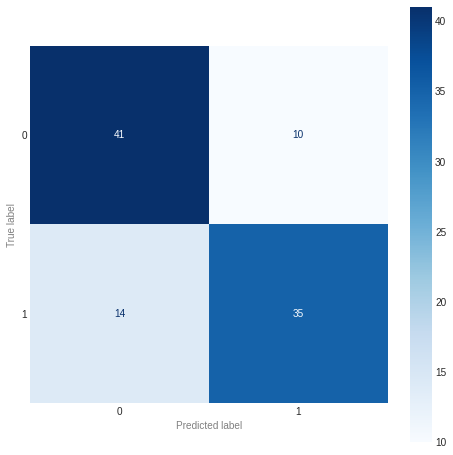

In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already made predictions and have ground truth labels
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_test_std, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

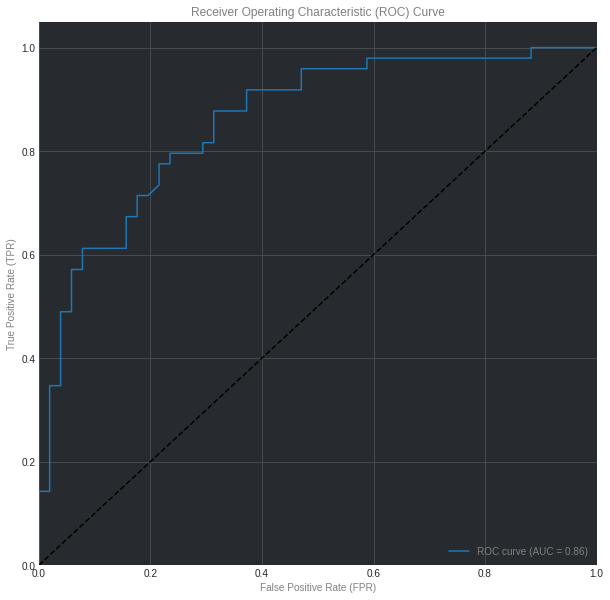

In [9]:
probs = clf.predict_proba(X_test_std)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(color='#4F5257') 

plt.show()

#### Single-trial cross-validated classification

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Initialization
scoring = make_scorer(matthews_corrcoef)
n_splits = 8
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

#clf = LogisticRegression(max_iter=1000)

# Perform cross-validation
X_std = scaler.transform(X)
cv_scores = cross_val_score(clf, X_std, y, cv=cv, scoring=scoring)
cv_scores

array([-0.03099224,  0.37277928, -0.05932203, -0.12497966, -0.40783546,
        0.26146597, -0.49254206,  0.09118946])

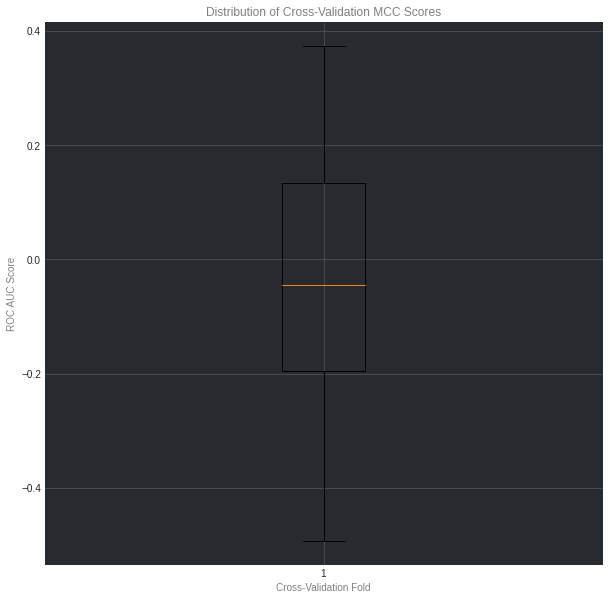

In [11]:
plt.boxplot(cv_scores)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('ROC AUC Score')
plt.title('Distribution of Cross-Validation MCC Scores')
plt.grid(color='#4F5257') 
plt.show()

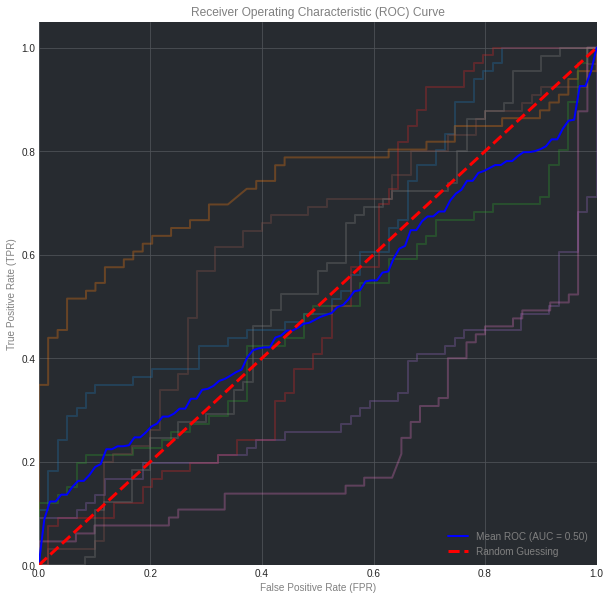

In [12]:
# Cross-validated ROC curve
def plot_cv_roc_curve(X, y, clf, cv, scaler, cnn=False):
    for train_index, test_index in cv.split(X, y):

        # Split train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Scaling the data
        scaler.fit(X_train)
        X_train_std = scaler.transform(X_train)
        X_test_std = scaler.transform(X_test)
        
        # Reshape the data for 1D CNN input
        if cnn:
            X_train = X_train.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
            X_test = X_test.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))

        clf.fit(X_train_std, y_train)
        probs = clf.predict_proba(X_test_std)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(color='#4F5257') 
    plt.show()
    
scaler = MinMaxScaler()
plot_cv_roc_curve(X=X, y=y, cv=cv, clf=clf, scaler=scaler)

#### Applying PCA for dimensionality reduction

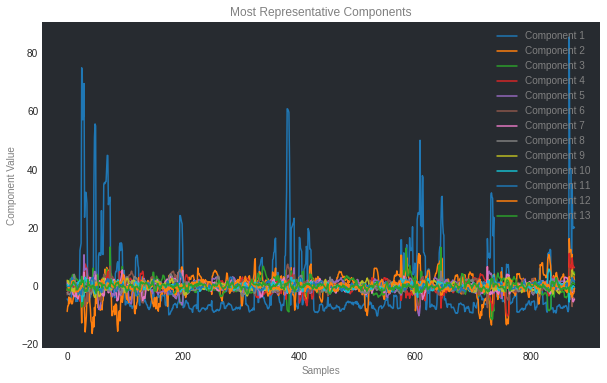

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(X_train_std)

# Get the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components to retain
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Transform the features to the reduced-dimensional space
reduced_features = pca.transform(X_train_std)[:, :num_components]

# Plot the most representative components
plt.figure(figsize=(10, 6))
for i in range(num_components):
    plt.plot(reduced_features[:, i], label=f'Component {i+1}')

plt.xlabel('Samples')
plt.ylabel('Component Value')
plt.legend()
plt.title('Most Representative Components')
plt.show()

### Classification with Convolutional Neural Network

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy

# Assuming you have your EEG features stored in 'X' and corresponding labels in 'y'
# X shape: (num_samples, num_features)
# y shape: (num_samples, num_classes)

# Convert binary labels to one-hot encoding
num_classes = 2

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Reshape the data for 1D CNN input
X_train_std = X_train_std.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
X_val_std = X_val_std.reshape((X_val_std.shape[0], X_val_std.shape[1], 1))
X_test_std = X_test_std.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))

# Define the CNN architecture
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

# Train the model
history = model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=50, batch_size=32)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_std, y_test, batch_size=32)

# Make predictions
predictions = model.predict(X_test_std)


Epoch 1/50
20/20 [==============================] - 1s 25ms/step - loss: 0.6844 - binary_accuracy: 0.5516 - val_loss: 0.6823 - val_binary_accuracy: 0.5125
Epoch 2/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6749 - binary_accuracy: 0.5594 - val_loss: 0.6638 - val_binary_accuracy: 0.5375
Epoch 3/50
20/20 [==============================] - 0s 14ms/step - loss: 0.6586 - binary_accuracy: 0.5859 - val_loss: 0.6435 - val_binary_accuracy: 0.6500
Epoch 4/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6338 - binary_accuracy: 0.6031 - val_loss: 0.6280 - val_binary_accuracy: 0.6875
Epoch 5/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6171 - binary_accuracy: 0.6609 - val_loss: 0.6030 - val_binary_accuracy: 0.6750
Epoch 6/50
20/20 [==============================] - 0s 14ms/step - loss: 0.5915 - binary_accuracy: 0.6609 - val_loss: 0.6024 - val_binary_accuracy: 0.6500
Epoch 7/50
20/20 [==============================] - 0s 14ms/step - los

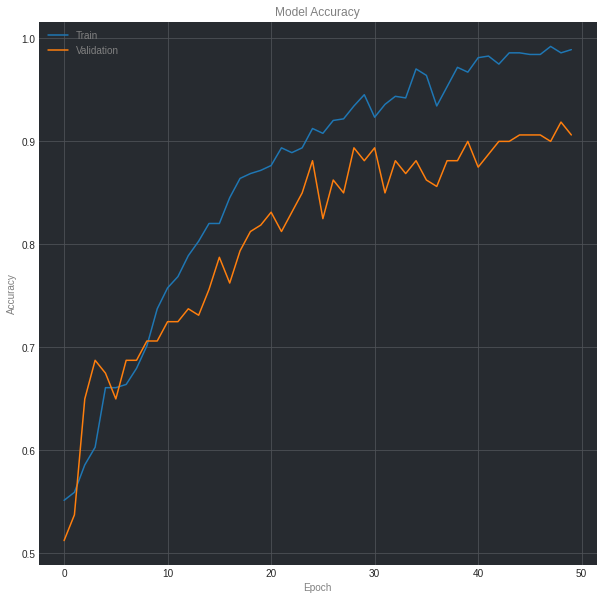

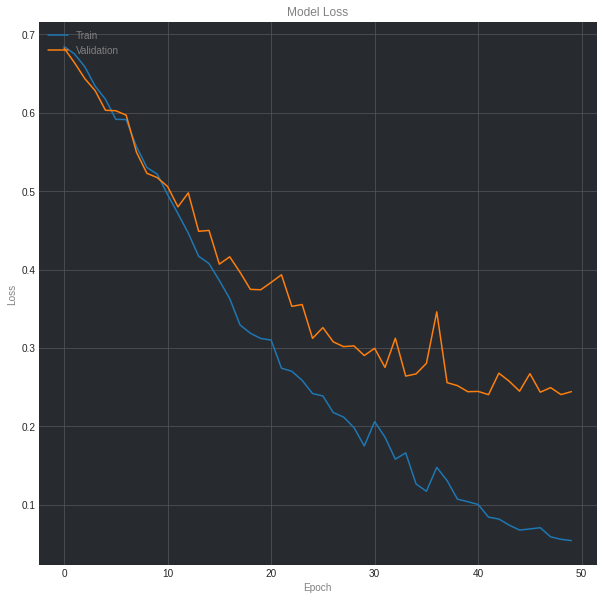

In [14]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(color='#4F5257') 
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(color='#4F5257') 
plt.show()

In [ ]:
# Assuming you have your EEG features stored in 'X' and corresponding binary labels in 'y'
# X shape: (num_samples, num_features)
# y shape: (num_samples,)

# Create a meshgrid to cover the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Reshape the meshgrid points for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the grid points
grid_predictions = model.predict(grid_points)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scoring = make_scorer(matthews_corrcoef)
n_splits = 8
cv = StratifiedKFold(n_splits=n_splits)

num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=False)

# Initialize lists to store the true labels and predicted probabilities
true_labels = []
pred_probabilities = []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Store true labels and predicted probabilities
    true_labels.extend(y_test)
    pred_probabilities.extend(y_pred_proba)

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, pred_probabilities)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Cross-Validated ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()